# Modeling and Simulation in Python

Chapter 22: Vectors

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Vectors

A `Vector` object represents a vector quantity.  In the context of mechanics, vector quantities include position, velocity, acceleration, and force, all of which might be in 2D or 3D.

You can define a `Vector` object without units, but if it represents a physical quantity, you will often want to attach units to it.

I'll start by grabbing the units we'll need.

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

<Unit('kilogram')>

Here's a two dimensional `Vector` in meters.

In [3]:
A = Vector(3, 4) * m

<Quantity([3. 4.], 'meter')>

We can access the elements by name.

In [4]:
A.x

<Quantity(3.0, 'meter')>

In [5]:
A.y

<Quantity(4.0, 'meter')>

The magnitude is the length of the vector.

In [6]:
A.mag

<Quantity(5.0, 'meter')>

The angle is the number of radians between the vector and the positive x axis.

In [7]:
A.angle

<Quantity(0.9272952180016122, 'radian')>

If we make another `Vector` with the same units,

In [8]:
B = Vector(1, 2) * m

<Quantity([1. 2.], 'meter')>

We can add `Vector` objects like this

In [9]:
A + B

<Quantity([4. 6.], 'meter')>

And subtract like this:

In [10]:
A - B

<Quantity([2. 2.], 'meter')>

We can compute the Euclidean distance between two Vectors.

In [11]:
A.dist(B)

<Quantity(2.8284271247461903, 'meter')>

And the difference in angle

In [12]:
A.diff_angle(B)

<Quantity(-0.17985349979247822, 'radian')>

If we are given the magnitude and angle of a vector, what we have is the representation of the vector in polar coordinates.

In [13]:
mag = A.mag
angle = A.angle

<Quantity(0.9272952180016122, 'radian')>

We can use `pol2cart` to convert from polar to Cartesian coordinates, and then use the Cartesian coordinates to make a `Vector` object.

In this example, the `Vector` we get should have the same components as `A`.

In [14]:
x, y = pol2cart(angle, mag)
Vector(x, y)

<Quantity([3. 4.], 'meter')>

**Exercise:** Create a `Vector` named `a_grav` that represents acceleration due to gravity, with x component 0 and y component $-9.8$ meters / second$^2$.

In [15]:
# Solution

a_grav = Vector(0, -9.8 * m / s**2)

<Quantity([ 0.  -9.8], 'meter / second ** 2')>

### Degrees and radians

Pint provides units to represent degree and radians.

In [16]:
degree = UNITS.degree
radian = UNITS.radian

<Unit('radian')>

If you have an angle in degrees,

In [17]:
angle = 45 * degree
angle

<Quantity(45, 'degree')>

You can convert to radians.

In [18]:
angle_rad = angle.to(radian)

<Quantity(0.7853981633974483, 'radian')>

If it's already in radians, `to` does the right thing.

In [19]:
angle_rad.to(radian)

<Quantity(0.7853981633974483, 'radian')>

You can also convert from radians to degrees.

In [20]:
angle_rad.to(degree)

<Quantity(45.0, 'degree')>

As an alterative, you can use `np.deg2rad`, which works with Pint quantities, but it also works with simple numbers and NumPy arrays:

In [21]:
np.deg2rad(angle)

<Quantity(0.7853981633974483, 'radian')>

**Exercise:** Create a `Vector` named `a_force` that represents acceleration due to a force of 0.5 Newton applied to an object with mass 0.3 kilograms, in a direction 45 degrees up from the positive x-axis.

Add `a_force` to `a_grav` from the previous exercise.  If that addition succeeds, that means that the units are compatible.  Confirm that the total acceleration seems to make sense.

In [22]:
# Solution

N = UNITS.newton
mag = 0.5 * N
angle = 45 * degree
theta = angle.to(radian)
x, y = pol2cart(theta, mag)
force = Vector(x, y)
mass = 0.3 * kg
a_force = force / mass
a_force

<Quantity([1.1785113 1.1785113], 'newton / kilogram')>

In [23]:
# Solution

a_force + a_grav

<Quantity([ 1.1785113 -8.6214887], 'newton / kilogram')>

### Baseball

Here's a `Params` object that contains parameters for the flight of a baseball.

In [24]:
params = Params(x = 0 * m, 
                y = 1 * m,
                g = 9.8 * m/s**2,
                mass = 145e-3 * kg,
                diameter = 73e-3 * m,
                rho = 1.2 * kg/m**3,
                C_d = 0.3,
                angle = 45 * degree,
                velocity = 40 * m / s,
                t_end = 5.1 * s)

,values
x,0 meter
y,1 meter
g,9.8 meter / second ** 2
mass,0.145 kilogram
diameter,0.073 meter
rho,1.2 kilogram / meter ** 3
C_d,0.3
angle,45 degree
velocity,40.0 meter / second
t_end,5.1 second


And here's the function that uses the `Params` object to make a `System` object.

In [25]:
def make_system(params):
    """Make a system object.
    
    params: Params object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(params)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    return System(params, init=init, area=area)

Here's how we use it:

In [26]:
system = make_system(params)
system

,values
x,0 meter
y,1 meter
g,9.8 meter / second ** 2
mass,0.145 kilogram
diameter,0.073 meter
rho,1.2 kilogram / meter ** 3
C_d,0.3
angle,45 degree
velocity,40.0 meter / second
t_end,5.1 second


Here's a function that computes drag force using vectors:

In [27]:
def drag_force(v, system):
    """Computes drag force in the opposite direction of `v`.
    
    v: velocity
    
    returns: drag force
    """
    unpack(system)
    f_drag = -rho * v.mag * v * C_d * area / 2
    return f_drag

Here's the slope function that computes acceleration due to gravity and drag.

In [28]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)

    v = Vector(vx, vy)    
    a_drag = drag_force(v, system) / mass
    a_grav = Vector(0, -g)
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

Always test the slope function with the initial conditions.

In [29]:
slope_func(system.init, 0, system)

(<Quantity(28.284271247461902, 'meter / second')>,
 <Quantity(28.2842712474619, 'meter / second')>,
 <Quantity(-5.878209892331404, 'meter / second ** 2')>,
 <Quantity(-15.678209892331404, 'meter / second ** 2')>)

Now we can call `run_ode_solver`

In [30]:
ts = linspace(0, system.t_end, 101)
results, details = run_ode_solver(system, slope_func, t_eval=ts)
details

,values
sol,None
t_events,[]
nfev,44
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


Here are the results.

In [31]:
results.tail()

,x,y,vx,vy
4.896,100.281270,3.582940,15.138726,-21.333956
4.947,101.050904,2.485880,15.033555,-21.684263
4.998,101.815128,1.371072,14.928243,-22.030788
5.049,102.573915,0.238710,14.822817,-22.373499
5.100,103.327239,-0.911009,14.717306,-22.712358


The value of `y` at the end is negative, which means the ball has fallen through the ground.  We'll fix that soon, but first let's take a look at the results.

### Visualizing the results

The simplest way to visualize the results is to plot x and y as functions of time.

Saving figure to file figs/chap10-fig01.pdf


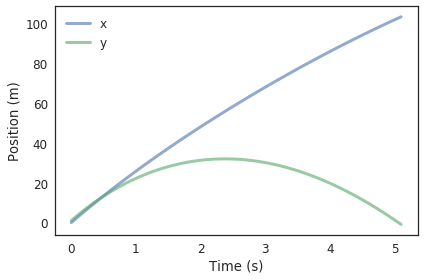

In [32]:
plot(results.x, label='x')
plot(results.y, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

savefig('figs/chap10-fig01.pdf')

We can plot the velocities the same way.

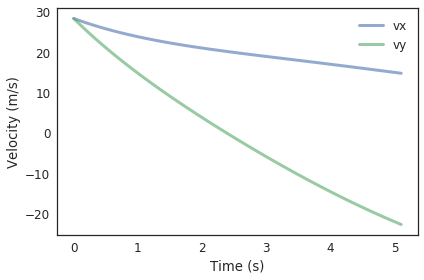

In [33]:
plot(results.vx, label='vx')
plot(results.vy, label='vy')

decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

The x velocity slows down due to drag.

The y velocity drops quickly while drag and gravity are in the same direction, then more slowly after the ball starts to fall.

Another way to visualize the results is to plot y versus x.  The result is the trajectory of the ball through its plane of motion.

Saving figure to file figs/chap10-fig02.pdf


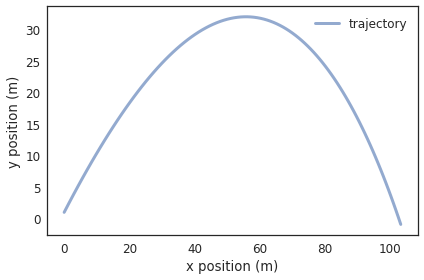

In [34]:
def plot_trajectory(results):
    plot(results.x, results.y, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
savefig('figs/chap10-fig02.pdf')

**Exercise:** Run the simulation for a few different launch angles and visualize the results.  Are they consistent with your expectations?

### Range finding

We can use an event function to stop the simulation when the ball hits the ground:

In [35]:
def event_func(state, t, system):
    """
    """
    x, y, vx, vy = state
    return y

In [36]:
event_func(system.init, 0, system)

<Quantity(1, 'meter')>

In [37]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[5.059652157746426]]
nfev,44
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [38]:
results

,x,y,vx,vy
0.000000,0.000000,1.000000e+00,28.284271,28.284271
0.000061,0.001731,1.001731e+00,28.283911,28.283312
0.000673,0.019044,1.019042e+00,28.280314,28.273715
0.006795,0.192053,1.191827e+00,28.244409,28.177866
0.068010,1.910206,2.887647e+00,27.892356,27.230464
0.680164,18.038107,1.686264e+01,24.963065,18.680690
2.526170,58.819075,3.188110e+01,19.822537,-1.467001
5.059652,102.731711,3.552714e-15,14.800785,-22.444594


Now the final value of `y` is close to 0.

The final value of `x` tells us the how far the ball landed from home plate:

In [39]:
x_dist = get_last_value(results.x) * m

<Quantity(102.7317108858609, 'meter')>

The final label tells us the flight time.

In [40]:
flight_time = get_last_label(results) * s

<Quantity(5.059652157746426, 'second')>

If we plot the results, we see that the ODE solver was able to take large time steps.

That's good for efficiency, but bad for visualization.

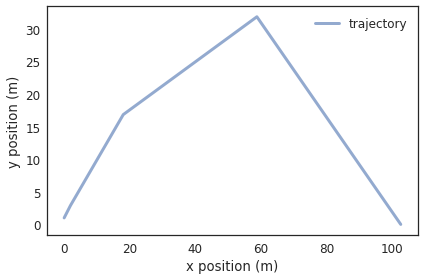

In [41]:
plot_trajectory(results)

We can get a smooth representation of the solution using the `t_eval` option with the flight time we just computed.

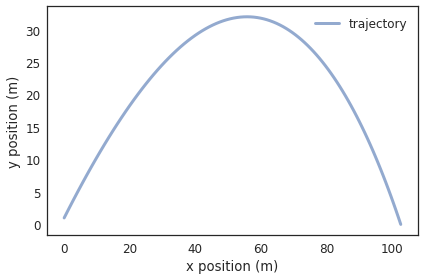

In [42]:
ts = linspace(0, flight_time, 101)
results, details = run_ode_solver(system, slope_func, t_eval=ts)
plot_trajectory(results)

**Exercise:** The baseball stadium in Denver, Colorado is 1,580 meters above sea level, where the density of air is about 1.0 kg / meter$^3$.  How much farther would a ball hit with the same velocity and launch angle travel?

Hint: create a new `Params` object like this:

In [43]:
params2 = Params(params, rho=1*kg/m**3)

,values
x,0 meter
y,1 meter
g,9.8 meter / second ** 2
mass,0.145 kilogram
diameter,0.073 meter
rho,1.0 kilogram / meter ** 3
C_d,0.3
angle,45 degree
velocity,40.0 meter / second
t_end,5.1 second


In [44]:
system2 = make_system(params2)
results2, details2 = run_ode_solver(system2, slope_func, events=event_func)
x_dist = get_last_value(results2.x) * m

<Quantity(108.16822487233662, 'meter')>

### Optimal launch angle

To find the launch angle that maximizes distance from home plate, we need a function that takes launch angle and returns range.

In [45]:
def range_func(angle, params):  
    """Computes range for a given launch angle.
    
    angle: launch angle in degrees
    params: Params object
    
    returns: distance in meters
    """
    params = Params(params, angle=angle)
    system = make_system(params)
    results, details = run_ode_solver(system, slope_func, events=event_func)
    x_dist = get_last_value(results.x) * m
    return x_dist

Let's test `range_func`.

In [46]:
%time range_func(45, params)

CPU times: user 104 ms, sys: 4 ms, total: 108 ms
Wall time: 105 ms


<Quantity(102.7317108858609, 'meter')>

And sweep through a range of angles.

In [47]:
params.set(t_end=20 * s)
angles = linspace(30, 60, 11)
sweep = SweepSeries()

for angle in angles:
    x_dist = range_func(angle, params)
    print(angle, x_dist)
    sweep[angle] = x_dist

30.0 97.10299349267837 meter
33.0 100.09329616243937 meter
36.0 102.13164668166665 meter
39.0 103.23823647462652 meter
42.0 103.43133801588436 meter
45.0 102.72776151763674 meter
48.0 101.14346120559365 meter
51.0 98.6941666640792 meter
54.0 95.39598860934672 meter
57.0 91.26604647117799 meter
60.0 86.32327611690422 meter


Plotting the `Sweep` object, it looks like the peak is between 40 and 45 degrees.

Saving figure to file figs/chap10-fig03.pdf


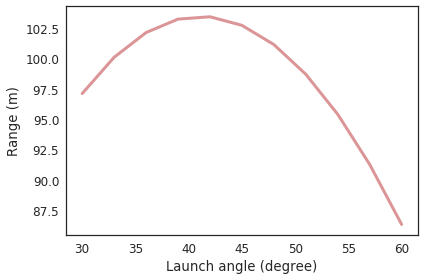

In [48]:
plot(sweep, color='C2')
decorate(xlabel='Launch angle (degree)',
         ylabel='Range (m)',
         legend=False)

savefig('figs/chap10-fig03.pdf')

We can use `max_bounded` to search for the peak efficiently.

In [49]:
%time res = max_bounded(range_func, [0, 90] * degree, params)

CPU times: user 468 ms, sys: 0 ns, total: 468 ms
Wall time: 466 ms


`res` is an `ModSimSeries` object with detailed results:

In [50]:
res

,values
fun,103.46837815997631 meter
status,0
success,True
message,Solution found.
x,0.7179943025032697 dimensionless
nfev,8


`x` is the optimal angle and `fun` the optional range.

In [51]:
optimal_angle = res.x * degree

<Quantity(0.7179943025032697, 'degree')>

In [52]:
max_x_dist = res.fun

<Quantity(103.46837815997631, 'meter')>

**Exercise:** Add a print statement to `range_func` that prints `angle`.  Then run `max_bounded` again so you can see how many times it calls `range_func` and what the arguments are.

**Exercise:** Implement `C_d` as a function of v, and see how much difference it makes.

### The Manny Ramirez problem

Finally, let's solve the Manny Ramirez problem:

*What is the minimum effort required to hit a home run in Fenway Park?*

Fenway Park is a baseball stadium in Boston, Massachusetts.  One of its most famous features is the "Green Monster", which is a wall in left field that is unusually close to home plate, only 310 feet along the left field line.  To compensate for the short distance, the wall is unusually high, at 37 feet.

Although the problem asks for a minimum, it is not an optimization problem.  Rather, we want to solve for the initial velocity that just barely gets the ball to the top of the wall, given that it is launched at the optimal angle.

And we have to be careful about what we mean by "optimal".  For this problem, we don't want the longest range, we want the maximum height at the point where it reaches the wall.

If you are ready to solve the problem on your own, go ahead.  Otherwise I will walk you through the process with an outline and some starter code.

As a first step, write a function called `height_func` that takes a launch angle and a params as parameters, simulates the flights of a baseball, and returns the height of the baseball when it reaches a point 94.5 meters (310 feet) from home plate.

In [53]:
# Solution

def event_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object
    
    returns: height
    """
    x, y, vx, vy = state
    # TODO: add 94.5 as a system variable
    return x - 94.5 * m

Always test the slope function with the initial conditions.

In [54]:
# Solution

event_func(system.init, 0, system)

<Quantity(-94.5, 'meter')>

In [55]:
# Solution

def height_func(angle, params):
    """Computes the height of the ball at the wall.
    
    angle: launch angle in degrees
    params: Params object
    
    returns: height in meters
    """    
    params = Params(params, angle=angle)
    system = make_system(params)
    results, details = run_ode_solver(system, slope_func, events=event_func)
    height = get_last_value(results.y) * m
    
    return height

Test your function with a launch angle of 45 degrees:

In [56]:
# Solution

height_func(45 * degree, params)

<Quantity(11.033479404035504, 'meter')>

Now use `max_bounded` to find the optimal angle.  Is it higher or lower than the angle that maximizes range?

In [57]:
# Solution

res = max_bounded(height_func, [0, 90], params)

,values
fun,11.047828055637911 meter
status,0
success,True
message,Solution found.
x,44.5406
nfev,12


In [58]:
# Solution

optimal_angle = res.x * degree

<Quantity(44.54061679798295, 'degree')>

In [59]:
# Solution

optimal_height = res.fun

<Quantity(11.047828055637911, 'meter')>

With initial velocity 40 m/s and an optimal launch angle, the ball clears the Green Monster by about half a meter.

Which means we can get over the wall with a lower initial velocity.

### Finding the minimum velocity

Even though we are finding the "minimum" velocity, we are not really solving a minimization problem.  Rather, we want to find the velocity that makes the height at the wall exactly 11 m, given given that it's launched at the optimal angle.  And that's a job for `fsolve`.

Write an error function that takes a velocity and a `Params` object as parameters.  It should use `max_bounded` to find the highest possible height of the ball at the wall, for the given velocity.  Then it should return the difference between that optimal height and 11 meters.

In [60]:
# Solution

def error_func(velocity, params):
    """Returns the optimal height at the wall minus the target height.
    
    velocity: initial velocity in m/s
    params: Params object
    
    returns: height difference in meters
    """
    params = Params(params, velocity=velocity)
    res = max_bounded(height_func, [0, 90], params)
    return res.fun - 11 * m

Test your error function before you call `fsolve`.

In [61]:
# Solution

error_func(40 * m/s, params)

<Quantity(0.04782805563791115, 'meter')>

Finally, we can use `fsolve` to find the initial velocity that makes the height of the ball exactly 11 meters when it reaches the wall.

Then use `fsolve` to find the answer to the problem, the minimum velocity that gets the ball out of the park.

In [62]:
# Solution

res = fsolve(error_func, 40 * m/s, params)

array([39.98806408])

In [63]:
# Solution

min_velocity = res[0] * m/s

<Quantity(39.988064078851245, 'meter / second')>

And just to check, run `error_func` with the value you found.

In [64]:
# Solution

error_func(min_velocity, params)

<Quantity(2.0497346042702702e-09, 'meter')>